In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sign_mnist_train.csv')
tst = pd.read_csv('sign_mnist_test.csv')

In [3]:
df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149


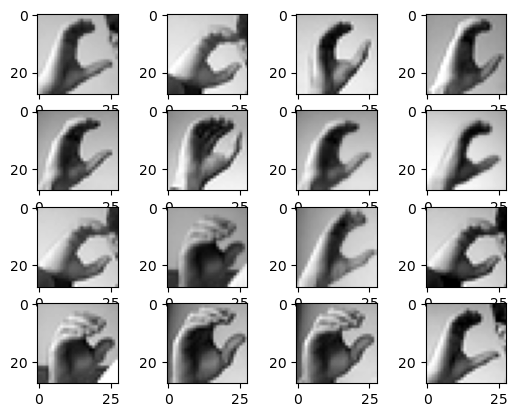

In [4]:
# The first column is the label
indexes = df[df['label'] == 2].index[0:16]
photos = []

for i in indexes:
    data = df.iloc[i]
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    photos.append(pixels)




fig = plt.figure()

for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(photos[i], cmap='gray')



In [5]:
# LDA with no sheninigans
X_train = df.drop('label', axis=1)
y_train = df['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

X_test = tst.drop('label', axis=1)
y_test = tst['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

0.4326547685443391
[0.82175227 0.63194444 0.78709677 0.61632653 0.6064257  0.42105263
 0.49712644 0.53669725 0.13194444 0.3897281  0.44019139 0.25888325
 0.24054983 0.41869919 0.2074928  0.49390244 0.15972222 0.34552846
 0.47983871 0.30075188 0.26589595 0.39805825 0.3258427  0.28614458]


In [6]:
acc = np.append(matrix.diagonal()/matrix.sum(axis=1), [overall_accuracy])
xx = np.arange(0,25)
xx = np.append(xx,['All'])
xx = np.delete(xx, 9)
sns.barplot(x=xx,y=acc)

In [7]:
xx = np.append(xx,['All'])
xx = np.delete(xx, 9)

In [8]:
import seaborn as sns

<AxesSubplot:>

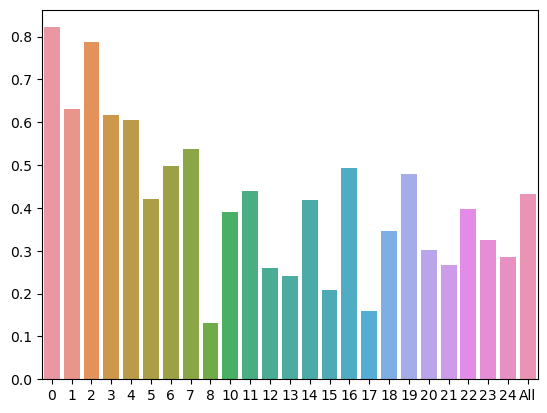

In [9]:
sns.barplot(x=xx,y=acc)

In [10]:
overall_accuracy

0.4326547685443391

0.6143335192414947
[0.84592145 0.89583333 0.82903226 0.5877551  0.82931727 0.66801619
 0.56321839 0.58027523 0.6875     0.46223565 0.99521531 0.60152284
 0.17525773 0.75203252 0.32564841 0.74390244 0.39583333 0.52845528
 0.57258065 0.39097744 0.43930636 0.52427184 0.68539326 0.5060241 ]


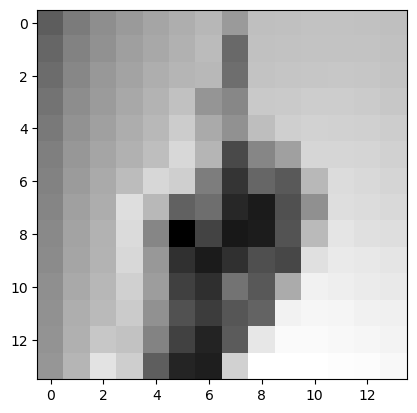

In [69]:
#skimage resize with interpolation LDA
import numpy as np
from skimage.transform import resize

def downsize(data):
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    
    dim1, dim2 = 14, 14
    test_resized = resize(pixels,(dim1,dim2), anti_aliasing=False)
    return np.append(test_resized.flatten(), label)


new_rows = []
for index, row in df.iterrows():
    new_rows.append(downsize(row))
    
new_test_rows = []
for index, row in tst.iterrows():
    new_test_rows.append(downsize(row))
    
    
new_df = pd.DataFrame(new_rows)
new_test = pd.DataFrame(new_test_rows)

pixels = new_df.drop(196, axis=1).iloc[0]
pixels = np.array(pixels)
pixels = pixels.reshape((14, 14))

plt.imshow(pixels, cmap='gray')

X_train = new_df.drop(196, axis=1)
y_train = new_df[196]

X_test = new_test.drop(196, axis=1)
y_test = new_test[196]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

In [8]:
# cutting top and bottom additionally LDA
ndf = new_df.iloc[:, list(range(14*1, 14*12))] # cutting off top and bottom of picture
ndf['label'] = df['label']

tdf = new_test.iloc[:, list(range(14*1, 14*12))] # cutting off top and bottom of picture
tdf['label'] = tst['label']

X_train = ndf.drop('label', axis=1)
y_train = ndf['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

X_test = tdf.drop('label', axis=1)
y_test = tdf['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

C:\Users\mariusarlauskas\AppData\Local\Temp\ipykernel_6960\2270350709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['label'] = df['label']
C:\Users\mariusarlauskas\AppData\Local\Temp\ipykernel_6960\2270350709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['label'] = tst['label']


0.6126603457891802
[0.90332326 0.85416667 0.77419355 0.66530612 0.85943775 0.49797571
 0.47701149 0.64678899 0.54513889 0.49244713 1.         0.49238579
 0.21305842 0.67479675 0.58501441 0.72560976 0.38888889 0.55284553
 0.55645161 0.5        0.45375723 0.59223301 0.53183521 0.50301205]


In [9]:
#taking every second pixel

0.5779419966536531
[0.86102719 0.71759259 0.86451613 0.65306122 0.69879518 0.4534413
 0.60344828 0.6353211  0.44444444 0.41087613 0.81818182 0.65736041
 0.20274914 0.58130081 0.57925072 0.74390244 0.47222222 0.44308943
 0.64516129 0.37969925 0.34682081 0.36893204 0.58801498 0.49698795]


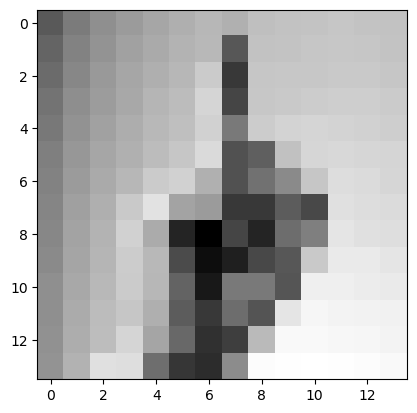

In [10]:
import numpy as np
from skimage.transform import resize

def downsize(data):
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    
    dim1, dim2 = 14, 14
    test_resized = pixels[::2, ::2]
    return test_resized.flatten()


new_rows = []
for index, row in df.iterrows():
    new_rows.append(downsize(row))
    
new_test_rows = []
for index, row in tst.iterrows():
    new_test_rows.append(downsize(row))
    
new_df = pd.DataFrame(new_rows)
new_test = pd.DataFrame(new_test_rows)

X_train = new_df
y_train = df['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

X_test = new_test
y_test = tst['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))    


pixels = new_df.iloc[0]
pixels = np.array(pixels)
pixels = pixels.reshape((14, 14))

plt.imshow(pixels, cmap='gray')

In [11]:
# downsizing with interpolation + antialiasing

0.6214445064138315
[0.8489426  0.90046296 0.8483871  0.6122449  0.85341365 0.63967611
 0.57758621 0.5733945  0.6875     0.45619335 0.99521531 0.60406091
 0.18556701 0.75203252 0.36887608 0.74390244 0.38194444 0.5203252
 0.58467742 0.40225564 0.48554913 0.5        0.68164794 0.5060241 ]


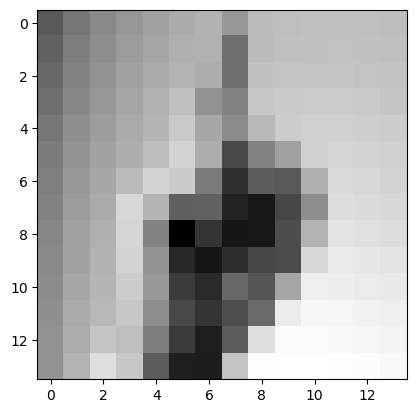

In [12]:
import numpy as np
from skimage.transform import resize

def downsize(data):
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    
    dim1, dim2 = 14, 14
    test_resized = resize(pixels,(dim1,dim2), anti_aliasing=True)
    return test_resized.flatten()


new_rows = []
for index, row in df.iterrows():
    new_rows.append(downsize(row))
    
new_test_rows = []
for index, row in tst.iterrows():
    new_test_rows.append(downsize(row))
    
new_df = pd.DataFrame(new_rows)
new_test = pd.DataFrame(new_test_rows)

X_train = new_df
y_train = df['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

X_test = new_test
y_test = tst['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))    


pixels = new_df.iloc[0]
pixels = np.array(pixels)
pixels = pixels.reshape((14, 14))

plt.imshow(pixels, cmap='gray')

In [13]:
# QDA

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

X_train = df.drop('label', axis=1)
y_train = df['label']

X_test = tst.drop('label', axis=1)
y_test = tst['label']

clf = QDA()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

0.6574177356385945
[1.         0.625      0.93225806 0.92244898 0.38353414 0.99190283
 0.70689655 0.3853211  0.78819444 0.68882175 0.89952153 0.4035533
 0.73539519 0.68292683 0.18443804 1.         0.97222222 0.91869919
 0.58467742 0.61278195 0.30346821 0.89805825 0.61048689 0.63253012]


<AxesSubplot:>

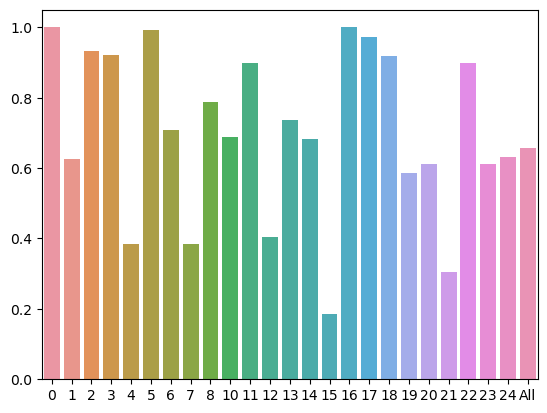

In [12]:
acc = np.append(matrix.diagonal()/matrix.sum(axis=1), [overall_accuracy])
xx = np.arange(0,25)
xx = np.append(xx,['All'])
xx = np.delete(xx, 9)
sns.barplot(x=xx,y=acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.7297824874511991
[0.93655589 0.71527778 0.93225806 0.92244898 0.78514056 0.82995951
 0.82471264 0.58944954 0.70486111 0.78549849 0.81818182 0.54314721
 0.71134021 0.7601626  0.5389049  1.         0.86111111 0.93089431
 0.50403226 0.60150376 0.35549133 0.99029126 0.62546816 0.70783133]


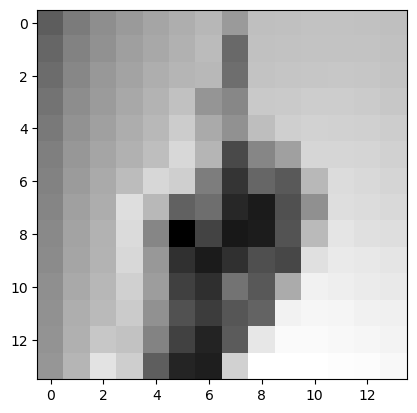

In [16]:
#skimage resize with interpolation QDA
import numpy as np
from skimage.transform import resize

def downsize(data):
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    
    dim1, dim2 = 14, 14
    test_resized = resize(pixels,(dim1,dim2), anti_aliasing=False)
    return np.append(test_resized.flatten(), label)


new_rows = []
for index, row in df.iterrows():
    new_rows.append(downsize(row))
    
new_test_rows = []
for index, row in tst.iterrows():
    new_test_rows.append(downsize(row))
    
    
new_df = pd.DataFrame(new_rows)
new_test = pd.DataFrame(new_test_rows)

pixels = new_df.drop(196, axis=1).iloc[0]
pixels = np.array(pixels)
pixels = pixels.reshape((14, 14))

plt.imshow(pixels, cmap='gray')

X_train = new_df.drop(196, axis=1)
y_train = new_df[196]

X_test = new_test.drop(196, axis=1)
y_test = new_test[196]

# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

clf = QDA()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

In [17]:
# cutting top and bottom additionally QDA
ndf = new_df.iloc[:, list(range(14*1, 14*12))] # cutting off top and bottom of picture
ndf['label'] = df['label']

tdf = new_test.iloc[:, list(range(14*1, 14*12))] # cutting off top and bottom of picture
tdf['label'] = tst['label']

X_train = ndf.drop('label', axis=1)
y_train = ndf['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = QDA()
clf.fit(X_train, y_train)

X_test = tdf.drop('label', axis=1)
y_test = tdf['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

C:\Users\mariusarlauskas\AppData\Local\Temp\ipykernel_6960\3330474011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['label'] = df['label']
C:\Users\mariusarlauskas\AppData\Local\Temp\ipykernel_6960\3330474011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['label'] = tst['label']
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.7225320691578361
[0.93655589 0.65046296 0.86451613 1.         0.75301205 0.82995951
 0.77011494 0.52522936 0.56944444 0.75830816 0.79904306 0.66751269
 0.56701031 0.91056911 0.36023055 1.         0.88194444 1.
 0.51612903 0.7481203  0.41040462 0.89805825 0.75655431 0.75      ]


0.7005019520356943
[0.93655589 0.625      0.80967742 0.95510204 0.76305221 0.8340081
 0.68965517 0.53440367 0.85416667 0.68882175 0.89473684 0.57360406
 0.64604811 0.6300813  0.37463977 1.         0.86111111 0.88617886
 0.58467742 0.66541353 0.39884393 0.80097087 0.66292135 0.69879518]


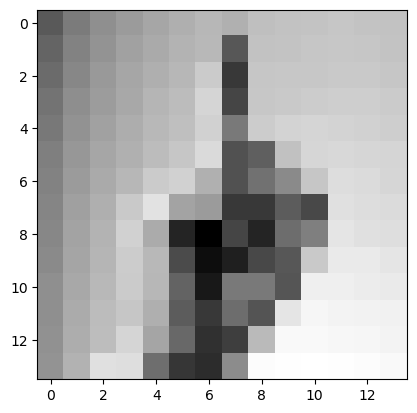

In [18]:
import numpy as np
from skimage.transform import resize
#every second pixel QDA
def downsize(data):
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    
    dim1, dim2 = 14, 14
    test_resized = pixels[::2, ::2]
    return test_resized.flatten()


new_rows = []
for index, row in df.iterrows():
    new_rows.append(downsize(row))
    
new_test_rows = []
for index, row in tst.iterrows():
    new_test_rows.append(downsize(row))
    
new_df = pd.DataFrame(new_rows)
new_test = pd.DataFrame(new_test_rows)

X_train = new_df
y_train = df['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = QDA()
clf.fit(X_train, y_train)

X_test = new_test
y_test = tst['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))    


pixels = new_df.iloc[0]
pixels = np.array(pixels)
pixels = pixels.reshape((14, 14))

plt.imshow(pixels, cmap='gray')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.7267150027886224
[0.93655589 0.72916667 0.93225806 0.92244898 0.7811245  0.82995951
 0.82471264 0.63302752 0.64930556 0.75528701 0.80382775 0.54314721
 0.71134021 0.76829268 0.50144092 1.         0.83333333 0.91463415
 0.5        0.53007519 0.35549133 0.90291262 0.77902622 0.70783133]


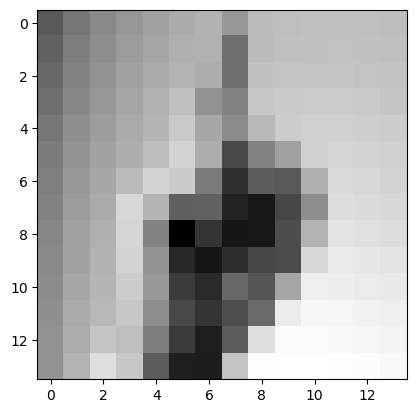

In [19]:
import numpy as np
from skimage.transform import resize

#antialias QDA
def downsize(data):
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    
    dim1, dim2 = 14, 14
    test_resized = resize(pixels,(dim1,dim2), anti_aliasing=True)
    return test_resized.flatten()


new_rows = []
for index, row in df.iterrows():
    new_rows.append(downsize(row))
    
new_test_rows = []
for index, row in tst.iterrows():
    new_test_rows.append(downsize(row))
    
new_df = pd.DataFrame(new_rows)
new_test = pd.DataFrame(new_test_rows)

X_train = new_df
y_train = df['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = QDA()
clf.fit(X_train, y_train)

X_test = new_test
y_test = tst['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))    


pixels = new_df.iloc[0]
pixels = np.array(pixels)
pixels = pixels.reshape((14, 14))

plt.imshow(pixels, cmap='gray')